<a href="https://colab.research.google.com/github/AshaNatty/credit-risk-logistic-regression-/blob/main/credit_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
df = pd.read_excel('/content/default of credit card clients.xls')
df.rename(columns={"default.payment.nexxt.month": "default"}, inplace=True)
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [9]:
features = [
    "LIMIT_BAL",
    "AGE",
    "PAY_0",
    "BILL_AMT1",
    "PAY_AMT1"
]

# Create a copy to avoid modifying the original df in place and potential SettingWithCopyWarning
df_fixed = df.copy()

# Set the column names using the first row values
df_fixed.columns = df_fixed.iloc[0]

# Drop the first row as it's now the header
df_fixed = df_fixed[1:].reset_index(drop=True)

# Rename the target column to 'default' as per the original intention
df_fixed.rename(columns={"default payment next month": "default"}, inplace=True)

# Convert relevant columns to numeric types, coercing errors to NaN
for col in features:
    if col in df_fixed.columns:
        df_fixed[col] = pd.to_numeric(df_fixed[col], errors='coerce')

# Convert the 'default' target column to numeric
if "default" in df_fixed.columns:
    df_fixed["default"] = pd.to_numeric(df_fixed["default"], errors='coerce')

x = df_fixed[features]
y = df_fixed["default"]


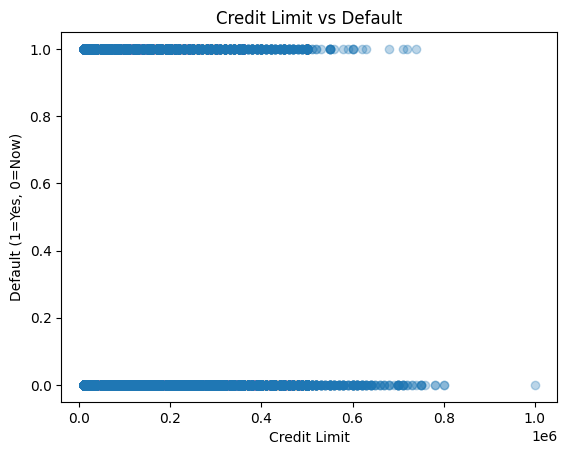

In [14]:
plt.scatter(df_fixed["LIMIT_BAL"], df_fixed["default"], alpha=0.3)
plt.xlabel("Credit Limit")
plt.ylabel("Default (1=Yes, 0=Now)")
plt.title("Credit Limit vs Default")
plt.show()

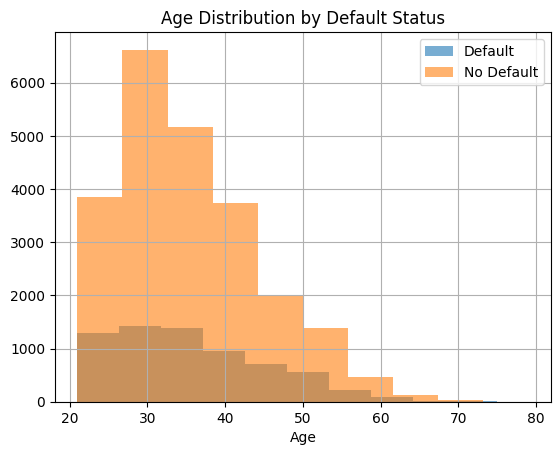

In [15]:
df_fixed[df_fixed["default"] == 1]["AGE"].hist(alpha=0.6, label="Default")
df_fixed[df_fixed["default"] == 0]["AGE"].hist(alpha=0.6, label="No Default")
plt.legend()
plt.xlabel("Age")
plt.title("Age Distribution by Default Status")
plt.show()

In [16]:
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
y_pred= model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8085
Confusion Matrix:
 [[4542  145]
 [1004  309]]


In [21]:
customer = [[200000, 35, 0, 50000, 2000]]
prob = model.predict_proba(customer)

print("Probability of Default:", prob[0][1])

Probability of Default: 0.19184575068736973


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [23]:
coef_df = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": model.coef_[0]
})

coef_df.sort_values(by="Coefficient")

,Feature,Coefficient
4,PAY_AMT1,-0.000010
3,BILL_AMT1,-0.000001
0,LIMIT_BAL,-0.000001
1,AGE,0.010453
2,PAY_0,0.703126
